# Izhikevich Neuron Model

Izhikevich neuron model is presented that reproduces spiking and bursting behavior of known types of cortical neurons. This model combines the biologically plausibility of Hodgkin–Huxley-type dynamics (HH model) and the computational efficiency of integrate-and-fire neurons (LIF model) .

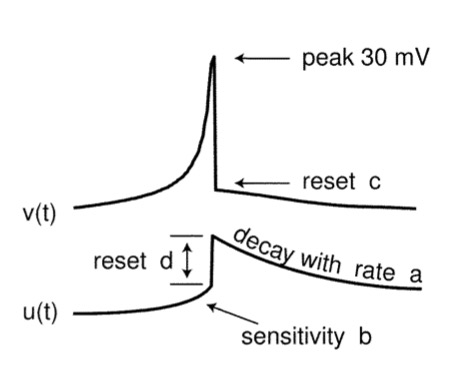

Bifurcation methodologies enable us to reduce many biophysically accurate Hodgkin–Huxley-type neuronal models to a two-dimensional system of ordinary differential equations of the form：

$$
\begin{array}{l}
\frac{d v}{d t}=0.04 v^{2}+5 v+140-u+I\\
\frac{d u}{d t}=a(b v-u)
\end{array}
$$

with the auxiliary after-spike resetting：

$$
\text { if } v \geq 30 \mathrm{mV}, \text { then }\left\{\begin{array}{l}
v \leftarrow c \\
u \leftarrow u+d .
\end{array}\right.
$$


$v$ represents the membrane potential of the neuron.


$u$ represents a membrane recovery variable, which accounts for the activation of $\mathrm{K}^{+}$ ionic currents and inactivation of $\mathrm{Na}^{+}$ ionic currents, and it provides negative feedback to $v$ .

<font size=4>**About the parameter ( $a,b,c,d$ ) :**</font>


**a:**  The parameter $a$ describes the time scale of the recovery variable $u$. Smaller values result in slower recovery. A typical value is $a = 0.02$.


**b:**  The parameter $b$ describes the sensitivity of the recovery variable $u$ to the subthreshold fluctuations of the membrane potential $v$ and depend the resting potential in the model ($60-70 mV$). Greater values couple $v$ and $u$ more strongly resulting in possible subthreshold oscillations and low-threshold spiking dynamics. A typical value is $b = 0.2$. 


**c:**  The parameter $c$ describes the after-spike reset value of the membrane potential $v$ caused by the fast high-threshold $\mathrm{K}^{+}$ conductances. A typical value is $c = 65 mV$.


**d:**  The parameter $d$ describes after-spike reset of the recovery variable $u$ caused by slow high-threshold $\mathrm{Na}^{+}$ and $\mathrm{K}^{+}$ conductances. A typical value is $d = 2$.


The threshold value of the model neuron is between $–70mV$ and $-50mV$, and it is dynamic, as in biological neurons.

In [1]:
#This cell sets up the python libraries need for the code and plotting the output.
import matplotlib.pyplot as plt
import npbrain as nb
import numpy as np

Summary of the neuro-computational properties of biological spiking neurons：

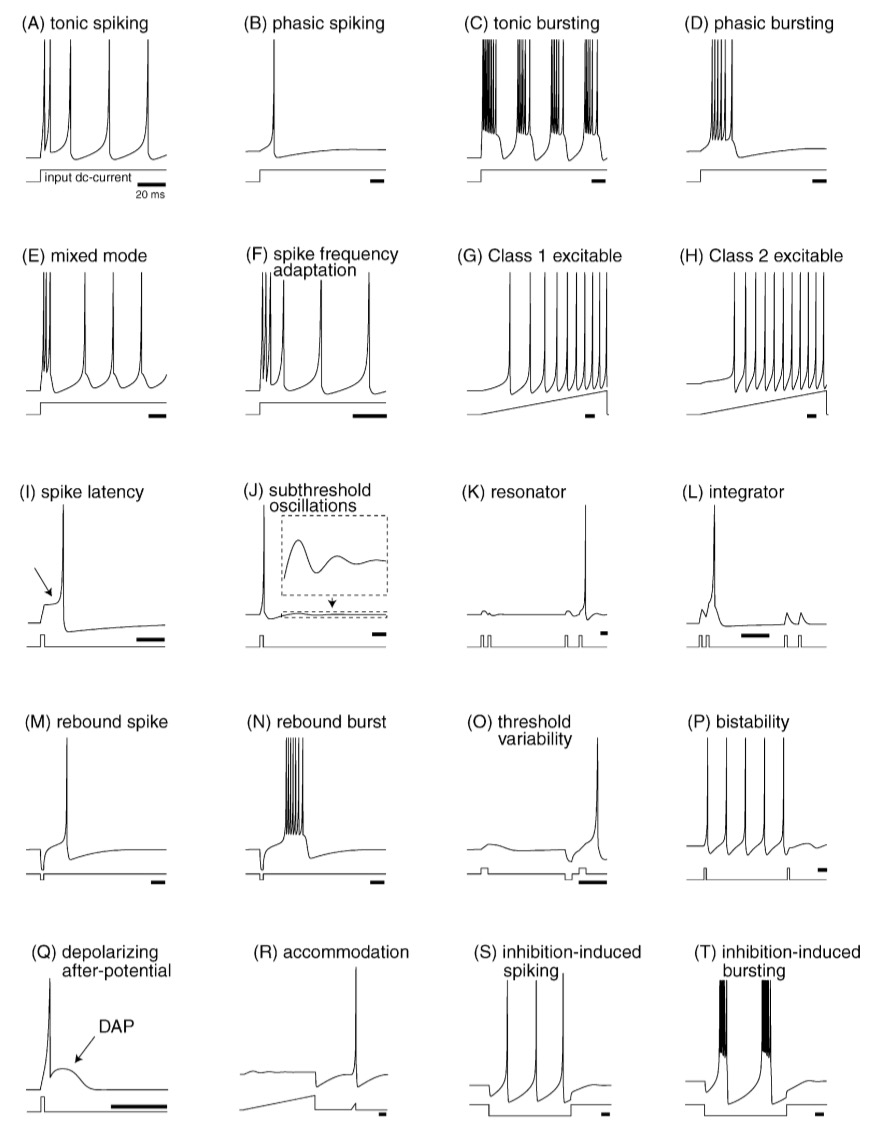

The model can exhibit ﬁring patterns of all known types of cortical neurons with the choice of parameters $a,b,c,d$ and given below.

In [2]:
def Izhikevich(a=0.02, b=0.20, c=-65., d=8., ref=0., noise=0., Vth=30., Vr=-65., mode=None):
    """Izhikevich two-variable neuron model.
    Parameters
    ----------
    mode : optional, str
        The neuron spiking mode.
    a : float
        It determines the time scale of the recovery variable :math:`u`.
    b : float
        It describes the sensitivity of the recovery variable :math:`u` to
        the sub-threshold fluctuations of the membrane potential :math:`v`.
    c : float
        It describes the after-spike reset value of the membrane potential
        :math:`v` caused by the fast high-threshold :math:`K^{+}` conductance.
    d : float
        It describes after-spike reset of the recovery variable :math:`u` caused
        by slow high-threshold :math:`Na^{+}` and :math:`K^{+}` conductance.
    ref : float
        Refractory period length. [ms]
    noise : float
        The noise fluctuation.
    Vth : float
        The membrane potential threshold.
    Vr : float
        The membrane reset potential.
    """    
    state = nb.types.NeuState(
        {'V': -65., 'u': 1., 'sp': 0., 'sp_t': -1e7, 'inp': 0.},
        help='''
        Izhikevich two-variable neuron model state.
        V : membrane potential [mV].
        u : recovery variable [mV].
        sp : spike state. 
        sp_t : last spike time.
        inp : input, including external and synaptic inputs.
        '''
    )
    
    #Neuro-computational properties
    if mode in ['tonic', 'tonic spiking']:
        a, b, c, d = [0.02, 0.40, -65.0, 2.0]
    elif mode in ['phasic', 'phasic spiking']:
        a, b, c, d = [0.02, 0.25, -65.0, 6.0]
    elif mode in ['tonic bursting']:
        a, b, c, d = [0.02, 0.20, -50.0, 2.0]
    elif mode in ['phasic bursting']:
        a, b, c, d = [0.02, 0.25, -55.0, 0.05]
    elif mode in ['mixed mode']:
        a, b, c, d = [0.02, 0.20, -55.0, 4.0]
    elif mode in ['SFA', 'spike frequency adaptation']:
        a, b, c, d = [0.01, 0.20, -65.0, 8.0]
    elif mode in ['Class 1', 'class 1']:
        a, b, c, d = [0.02, -0.1, -55.0, 6.0]
    elif mode in ['Class 2', 'class 2']:
        a, b, c, d = [0.20, 0.26, -65.0, 0.0]
    elif mode in ['spike latency', ]:
        a, b, c, d = [0.02, 0.20, -65.0, 6.0]
    elif mode in ['subthreshold oscillation' ]:
        a, b, c, d = [0.05, 0.26, -60.0, 0.0]
    elif mode in ['resonator', ]:
        a, b, c, d = [0.10, 0.26, -60.0, -1.0]
    elif mode in ['integrator', ]:
        a, b, c, d = [0.02, -0.1, -55.0, 6.0]
    elif mode in ['rebound spike', ]:
        a, b, c, d = [0.03, 0.25, -60.0, 4.0]
    elif mode in ['rebound burst', ]:
        a, b, c, d = [0.03, 0.25, -52.0, 0.0]
    elif mode in ['threshold variability', ]:
        a, b, c, d = [0.03, 0.25, -60.0, 4.0]
    elif mode in ['bistability', ]:
        a, b, c, d = [1.00, 1.50, -60.0, 0.0]
    elif mode in ['DAP', 'depolarizing afterpotential']:
        a, b, c, d = [1.00, 0.20, -60.0, -21.0]
    elif mode in ['accommodation', ]:
        a, b, c, d = [0.02, 1.00, -55.0, 4.0]
    elif mode in ['inhibition-induced spiking', ]:
        a, b, c, d = [-0.02, -1.00, -60.0, 8.0]
    elif mode in ['inhibition-induced bursting', ]:
        a, b, c, d = [-0.026, -1.00, -45.0, 0.0]
        
    #Neurons
    elif mode in ['Regular Spiking', 'RS' ]:
        a, b, c, d = [0.02,0.2,-65,8]
    elif mode in ['Intrinsically Bursting','IB' ]:
        a, b, c, d = [0.02,0.2,-55,4]
    elif mode in ['Chattering','CH']:
        a, b, c, d = [0.02,0.2,-50,2]
    elif mode in ['Fast Spiking','FS']:
        a, b, c, d = [0.1,0.2,-65,2]
    elif mode in ['Thalamo-cortical','TC' ]:
        a, b, c, d = [0.02,0.25,-65,0.05]
    elif mode in ['Resonator','RZ' ]:
        a, b, c, d = [0.1,0.26,-65,2]
    elif mode in ['Low-threshold Spiking','LTS' ]:
        a, b, c, d = [0.02,0.25,-65,2]
        

    @nb.integrate
    def int_u(u, t, V):
        return a * (b * V - u)

    @nb.integrate
    def int_V(V, t, u, Isyn):
        return 0.04 * V * V + 5 * V + 140 - u + Isyn

    if np.any(ref > 0.):

        def update(ST, _t_):
            V = int_V(ST['V'], _t_, ST['u'], ST['inp'])
            u = int_u(ST['u'], _t_, ST['V'])
            not_ref = (_t_ - ST['sp_t']) > ref
            for idx in np.where(np.logical_not(not_ref))[0]:
                V[idx] = ST['V'][idx]
                u[idx] = ST['u'][idx]
            sp = V >= Vth
            for idx in np.where(sp)[0]:
                V[idx] = c
                u[idx] += d
                ST['sp_t'] = _t_
            ST['sp'] = sp
            ST['V'] = V
            ST['u'] = u
            ST['inp'] = 0.
    else:

        def update(ST, _t_):
            V = int_V(ST['V'], _t_, ST['u'], ST['inp'])
            u = int_u(ST['u'], _t_, ST['V'])
            sp = V >= Vth
            spike_idx = np.where(sp)[0]
            for idx in spike_idx:
                V[idx] = c
                u[idx] += d
                ST['sp_t'] = _t_
            ST['V'] = V
            ST['u'] = u
            ST['sp'] = sp      
            ST['inp'] = 0.
        
    return nb.NeuType(name='Izhikevich', requires={'ST': state}, steps=update, vector_based=True)

<table><tbody>
    <tr>
        <th>Neuro-computational properties</th>
        <th>a</th>
        <th>b</th>
        <th>c</th>
        <th>d</th>
    </tr>
    <tr>
        <td>Tonic Spiking</td>
        <td>0.02</td>
        <td>0.4</td>
        <td>-65</td>
        <td>2</td>
    </tr>
    <tr>
        <td>Phasic Spiking</td>
        <td>0.02</td>
        <td>0.25</td>
        <td>-65</td>
        <td>6</td>
    </tr>
        <tr>
        <td>Tonic Bursting</td>
        <td>0.02</td>
        <td>0.2</td>
        <td>-50</td>
        <td>2</td>
    </tr>
        <tr>
        <td>Phasic Bursting</td>
        <td>0.02</td>
        <td>0.25</td>
        <td>-55</td>
        <td>0.05</td>
    </tr>
        <tr>
        <td>Mixed Model </td>
        <td>0.02</td>
        <td>0.2</td>
        <td>-55</td>
        <td>4</td>
    </tr>
        <tr>
        <td>Spike Frequency Adaptation</td>
        <td>0.01</td>
        <td>0.2</td>
        <td>-65</td>
        <td>8</td>
    </tr>
        <tr>
        <td>Class 1 Excitability</td>
        <td>0.02</td>
        <td>-0.1</td>
        <td>-55</td>
        <td>6</td>
    </tr>
        <tr>
        <td>Class 2 Excitability</td>
        <td>0.2</td>
        <td>0.26</td>
        <td>-65</td>
        <td>0</td>
    </tr>
        <tr>
        <td>Spike Latency</td>
        <td>0.02</td>
        <td>0.2</td>
        <td>-65</td>
        <td>6</td>
    </tr>
        <tr>
        <td>Subthreshold Oscillations</td>
        <td>0.05</td>
        <td>0.26</td>
        <td>-60</td>
        <td>0</td>
    </tr>
        <tr>
        <td>Resonator</td>
        <td>0.1</td>
        <td>0.26</td>
        <td>-60</td>
        <td>-1</td>
    </tr>
        <tr>
        <td>Integrator</td>
        <td>0.02</td>
        <td>-0.1</td>
        <td>-55</td>
        <td>6</td>
    </tr>
        <tr>
        <td>Rebound Spike</td>
        <td>0.03</td>
        <td>0.25</td>
        <td>-60</td>
        <td>4</td>
    </tr>
        <tr>
        <td>Rebound Burst</td>
        <td>0.03</td>
        <td>0.25</td>
        <td>-52</td>
        <td>0</td>
    </tr>
        <tr>
        <td>Threshold Variability</td>
        <td>0.03</td>
        <td>0.25</td>
        <td>-60</td>
        <td>4</td>
    </tr>
        <tr>
        <td>Bistability</td>
        <td>1</td>
        <td>1.5</td>
        <td>-60</td>
        <td>0</td>
    </tr>
        <tr>
        <td>Depolarizing After-Potentials</td>
        <td>1</td>
        <td>0.2</td>
        <td>-60</td>
        <td>-21</td>
    </tr>
        <tr>
        <td>Accommodation </td>
        <td>0.02</td>
        <td>1</td>
        <td>-55</td>
        <td>4</td>
    </tr>
        <tr>
        <td>Inhibition-Induced Spiking </td>
        <td>-0.02</td>
        <td>-1</td>
        <td>-60</td>
        <td>8</td>
    </tr>
        <tr>
        <td>Inhibition-Induced Bursting</td>
        <td>-0.026</td>
        <td>-1</td>
        <td>-45</td>
        <td>0</td>
    </tr>
</table> 
The table above gives the value of the parameter $a,b,c,d$ under 20 types of ﬁring patterns.

$ref$ represents Refractory period length. We need to make a judgment in the procedure whether the current state is in the refractory period.

# Model Input

<font size=4>**Neuro-computational properties :**</font>

The results shows each of the different firing patterns from different parameters.

The input to model $inp$ is a step function that is 0 mV from 0ms to 100 ms then steps to 10mV from 100ms to 400ms.

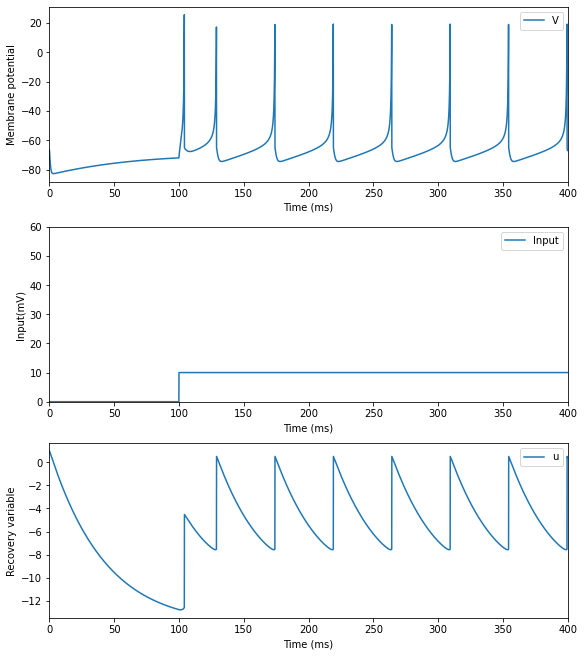

In [3]:
if __name__ == '__main__':
    nb.profile.set(backend='numba', )

    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='None'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 300, 0, 300)
    current1 = np.zeros(int(np.ceil(100/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=400., inputs=[neu, 'inp', current], report=False)

    fig, gs = nb.visualize.get_figure(3, 1, 3, 8)

    fig.add_subplot(gs[0, 0])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.legend()

    fig.add_subplot(gs[1, 0])
    plt.plot(net.ts, current, label='Input')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.ylim(0, 60)
    plt.ylabel('Input(mV)')
    plt.xlabel('Time (ms)')
    plt.legend()

    fig.add_subplot(gs[2, 0])
    plt.plot(net.ts, neu.mon.u[:, 0], label='u')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.ylabel('Recovery variable')
    plt.xlabel('Time (ms)')
    plt.legend()

The input to following six mode is a step function. The amplitude of the input changes in different mode.

The following interpretation of the most prominent features of biological spiking neurons is based on reference [1]

**Tonic Spiking:**

    While the inputison, the neuron continues to ﬁre a train of spikes. This kind of behavior, called tonic spiking, can be observed in the three types of cortical neurons: regular spiking (RS) excitatory neurons,low threshold spiking(LTS),and fast spiking (FS) inhibitory neurons.Continuous ﬁring of such neurons indicate that there is a persistent input.

**Phasic Spiking:**

    A neuron may ﬁre only a single spike at the onset of the input, and remain quiescent afterwards. Such a response is called phasic spiking, and it is useful for detection of the beginning of stimulation.

**Tonic Bursting:**

    Some neurons, such as the chattering neurons in cat neocortex, ﬁre periodic bursts of spikes when stimulated. The interburst frequency may be as high as 50 Hz, and it is believed that such neurons contribute to the gamma-frequency oscillations in the brain.

**Phasic Bursting:**

    Similarly to the phasic spikers, some neurons are phasic bursters. Such neurons report the beginning of the stimulation by transmitting a burst.

**Mixed Model:**

    Intrinsically bursting (IB) excitatory neurons in mammalian neocortex can exhibit a mixed type of spiking activity. They ﬁre a phasic burst at the onset of stimulation and then switch to the tonic spiking mode.

**Spike Frequency Adaptation:**

    The most common type of excitatory neuron in mammalian neocortex, namely the regular spiking (RS) cell, ﬁres tonic spikes with decreasing frequency. That is, the frequency is relatively high at the onset of stimulation, and then it adapts. Low-threshold spiking (LTS) inhibitory neurons also have this property. 

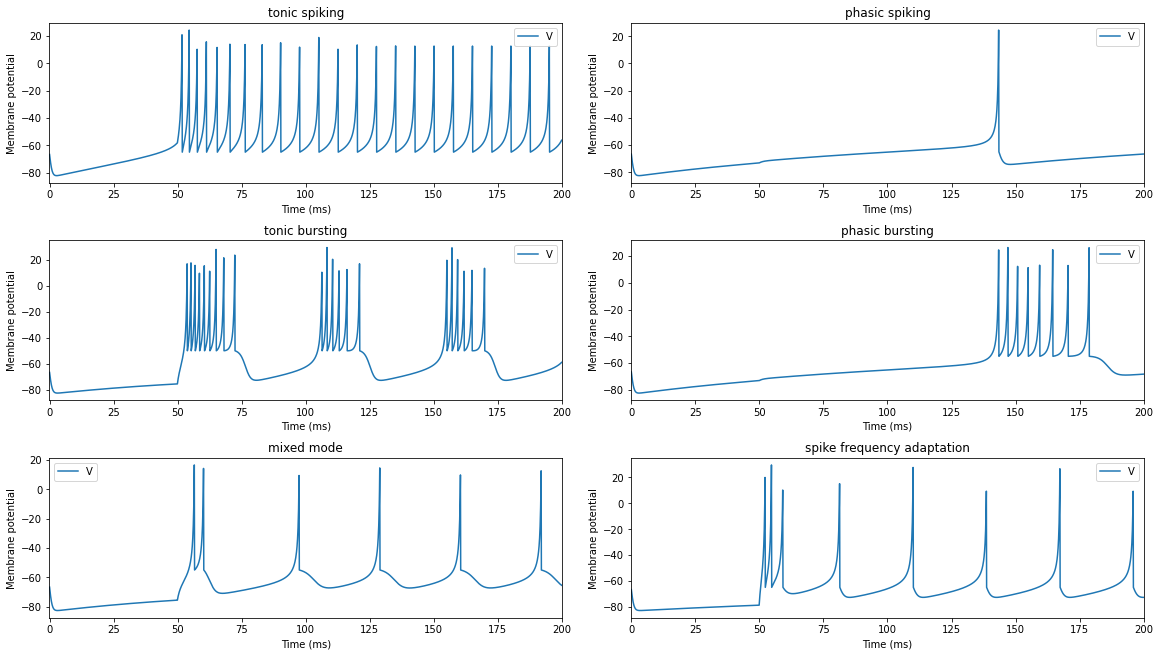

In [4]:
if __name__ == '__main__':
    nb.profile.set(backend='numba', )
    fig, gs = nb.visualize.get_figure(3, 2, 3, 8)
    
    #tonic spiking
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='tonic spiking'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[0, 0])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('tonic spiking')
    plt.legend()
    
    #phasic spiking
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='phasic spiking'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(1, 1, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[0, 1])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('phasic spiking')
    plt.legend()
    
    #tonic bursting
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='tonic bursting'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(15, 15, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[1, 0])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('tonic bursting')
    plt.legend()
    
   #phasic bursting
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='phasic bursting'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(1, 1, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[1, 1])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('phasic bursting')
    plt.legend()
    
    #mixed mode
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='mixed mode'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[2, 0])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('mixed mode')
    plt.legend()
    
    #spike frequency adaptation
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='spike frequency adaptation'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(30, 30, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[2, 1])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('spike frequency adaptation')
    plt.legend()

The input to following two mode is a function of time. 

**Class 1 Excitability:**

    The frequency of tonic spiking of neocortical RS excitatory neurons depends on the strength of the input, and it may span the range from 2 Hz to 200 Hz, or even greater. The ability to ﬁre low-frequency spikes when the input is weak (but superthreshold) is called Class 1 excitability.

**Class 2 Excitability:**

    Some neurons cannot ﬁre low-frequency spike trains. That is, they are either quiescent or ﬁre a train of spikes with a certain relatively large frequency, say 40 Hz. Such neurons are called Class 2 excitable.

<Figure size 432x288 with 0 Axes>

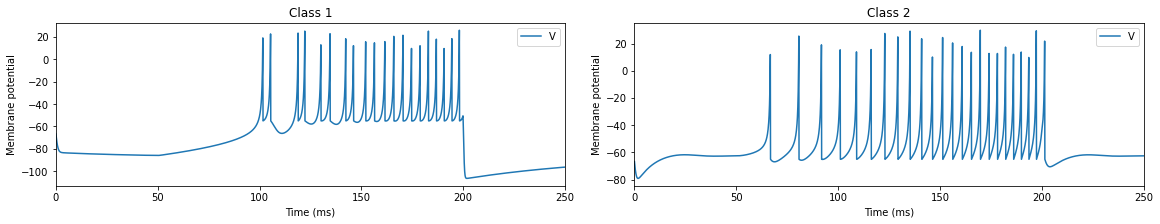

In [13]:
    plt.figure()
    fig, gs = nb.visualize.get_figure(1, 2, 3, 8)
              
    #Class 1
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Class 1'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(0, 80, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2,current1]
    net.run(duration=250., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[0,0])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Class 1')
    plt.legend()

    #Class 2
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Class 2'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(0, 10, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2,current1]
    net.run(duration=250., inputs=[neu, 'inp', current], report=False)
    
    fig.add_subplot(gs[0, 1])
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Class 2')
    plt.legend()

<font size=4>**Different types of neurons :**</font>

<table><tbody>
    <tr>
        <th>Neuron</th>
        <th>a</th>
        <th>b</th>
        <th>c</th>
        <th>d</th>
    </tr>
    <tr>
        <th>Regular Spiking (RS)</th>
        <th>0.02</th>
        <th>0.2</th>
        <th>-65</th>
        <th>8</th>
    </tr>
    <tr>
        <th>Intrinsically Bursting (IB)</th>
        <th>0.02</th>
        <th>0.2</th>
        <th>-55</th>
        <th>4</th>
    </tr>
    <tr>
        <th>Chattering (CH)</th>
        <th>0.02</th>
        <th>0.2</th>
        <th>-50</th>
        <th>2</th>
    </tr>
    <tr>
        <th>Fast Spiking (FS)</th>
        <th>0.1</th>
        <th>0.2</th>
        <th>-65</th>
        <th>2</th>
    </tr>
    <tr>
        <th>Thalamo-cortical (TC)</th>
        <th>0.02</th>
        <th>0.25</th>
        <th>-65</th>
        <th>0.05</th>
    </tr>
    <tr>
        <th>Resonator (RZ)</th>
        <th>0.1	</th>
        <th>0.26</th>
        <th>-65</th>
        <th>2</th>
    </tr>
    <tr>
        <th>Low-threshold Spiking (LTS)</th>
        <th>0.02</th>
        <th>0.25</th>
        <th>-65</th>
        <th>2</th>
    </tr>

**Regular Spiking (RS):**


a=0.02, b=0.2, c=-65, d=8

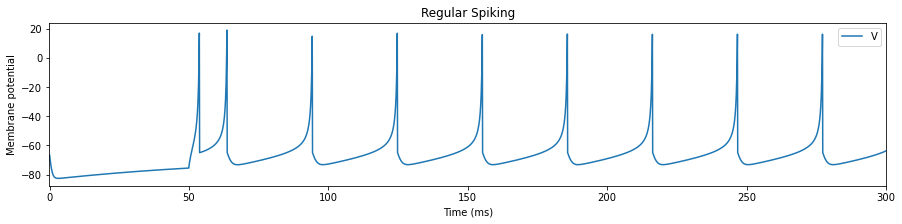

In [6]:
    #Regular Spiking (RS)
    plt.figure(figsize=(15,3))
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Regular Spiking'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(15, 15, 250, 0, 250)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=300., inputs=[neu, 'inp', current], report=False)
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Regular Spiking')
    plt.legend()

**Intrinsically Bursting (IB):**
    
    
a=0.02, b=0.2, c=-55, d=4

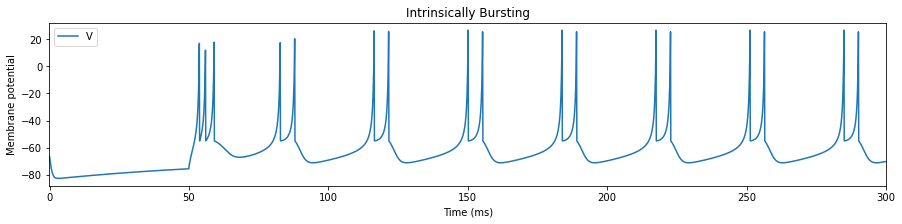

In [7]:
    #Intrinsically Bursting (IB)
    plt.figure(figsize=(15,3))
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Intrinsically Bursting'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(15, 15, 250, 0, 250)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=300., inputs=[neu, 'inp', current], report=False)
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Intrinsically Bursting')
    plt.legend()

**Chattering (CH):**
    
    
a=0.02, b=0.2, c=-50, d=2

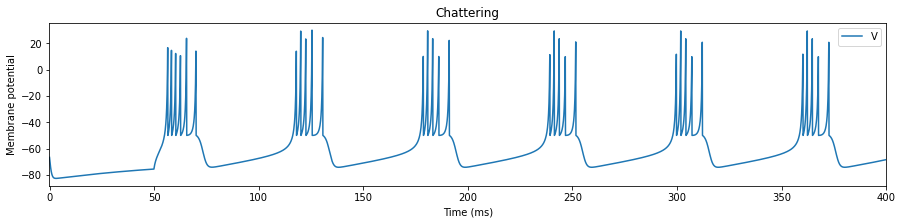

In [8]:
    #Chattering (CH)
    plt.figure(figsize=(15,3))
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Chattering'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 350, 0, 350)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=400., inputs=[neu, 'inp', current], report=False)
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Chattering')
    plt.legend()

**Fast Spiking (FS):**
    
    
a=0.1, b=0.2, c=-65, d=2

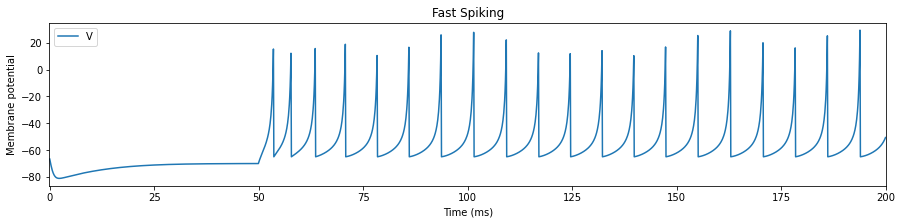

In [9]:
    #Fast Spiking (FS)
    plt.figure(figsize=(15,3))
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Fast Spiking'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Fast Spiking')
    plt.legend()

**Thalamo-cortical (TC):**
    
    
a=0.02, b=0.25, c=-65, d=0.05

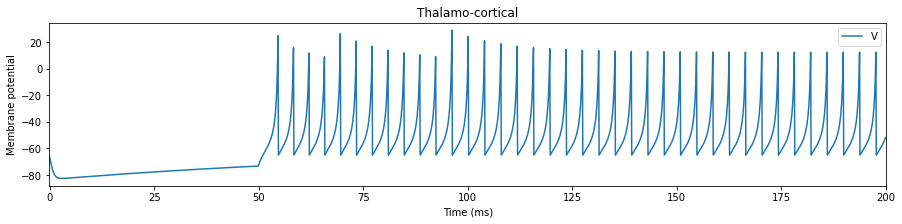

In [10]:
    #Thalamo-cortical (TC)
    plt.figure(figsize=(15,3))
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Thalamo-cortical'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Thalamo-cortical')
    plt.legend()

**Resonator (RZ):**
    
    
a=0.1, b=0.26, c=-65, d=2

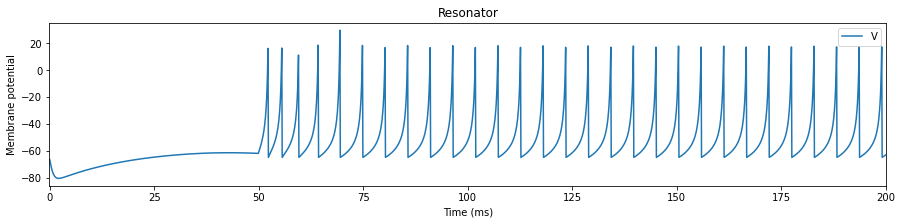

In [11]:
    #Resonator (RZ)
    plt.figure(figsize=(15,3))
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Resonator'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Resonator')
    plt.legend()

**Low-threshold Spiking (LTS):**
    
    
a=0.02, b=0.25, c=-65, d=2

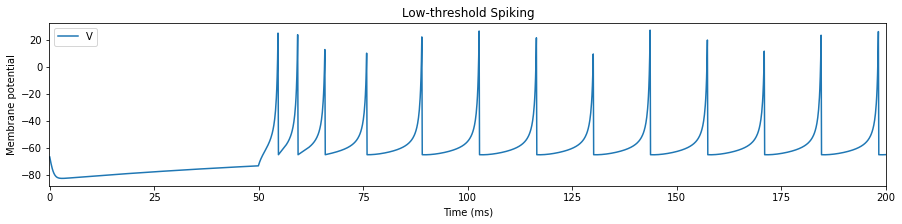

In [12]:
    #Low-threshold Spiking (LTS)
    plt.figure(figsize=(15,3))
    neu = nb.NeuGroup(Izhikevich, geometry=(1,), pars_update=dict(noise=0.,mode='Low-threshold Spiking'), monitors=['V', 'u'])
    net = nb.Network(neu)
    current2 = nb.inputs.ramp_current(10, 10, 150, 0, 150)
    current1 = np.zeros(int(np.ceil(50/0.1)))
    current = np.r_[current1, current2]
    net.run(duration=200., inputs=[neu, 'inp', current], report=False)
    plt.plot(net.ts, neu.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlim(-0.1, net._run_time + 0.1)
    plt.xlabel('Time (ms)')
    plt.title('Low-threshold Spiking')
    plt.legend()

<font size=3>**References:**</font>

[1]. Izhikevich, E. M . Which model to use for cortical spiking neurons?[J]. IEEE Trans Neural Netw, 2004, 15(5):1063-1070.

[2]. Izhikevich E M . Simple model of spiking neurons[J]. IEEE Transactions on Neural Networks, 2003, 14(6):1569-72.